In [27]:
import matplotlib.pyplot as plt
import matplotlib as mal
plt.rc('font',family='Malgun Gothic') # 폰트 선택ㅇ
plt.rc('font',size=11) #폰트크기 11
plt.rc('axes',unicode_minus=False) #한글 깨짐 방지
import pandas as pd
import  warnings
warnings.filterwarnings('ignore') #warning 경고를 무시하라는 기능

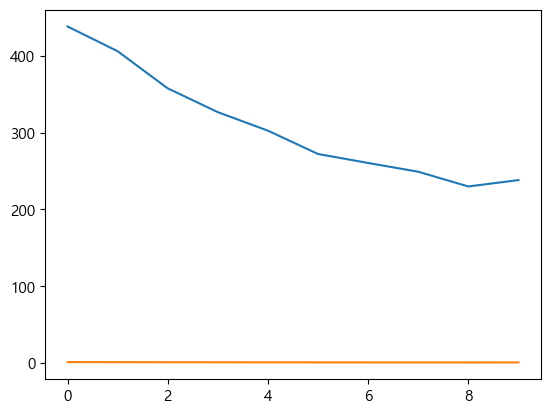

In [29]:
df=pd.read_excel('data/2015_2024출생아수합계출산율.xlsx',skiprows=2,nrows=2,index_col=0) #nrows 몇 개의 열값이 필요한가?
df
#출생아수는 막대 / 합계출산율은 꺾은선으로 같이 출력함
df.index.values #array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

#index 명 수정
df.rename(index={'출생아\xa0수':'출생아수'},inplace=True)
df.rename(index={'합계\xa0출산율':'합계출산율'},inplace=True)

#df의 열과 행의 위치를 바꿔주는 함수
df=df.T

df.index.name='년도'
df.reset_index(inplace=True)

# 출생아수, 합계출산율 꺾은선 그래프 만들기
plt.plot(df.index, df['출생아수'])
plt.plot(df.index, df['합계출산율'])

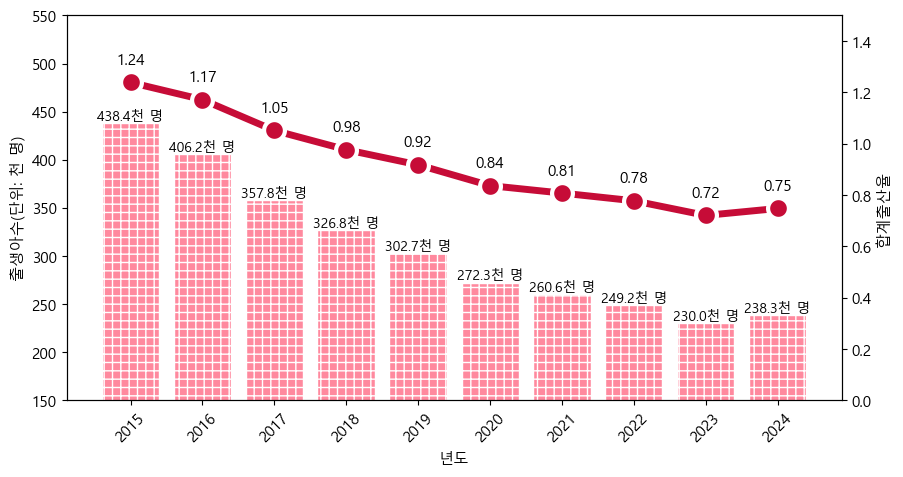

In [ ]:
#출생아수는 막대그래프, 출산율은 꺾은선그래프로 변경하기
years = [2015 + i for i in range(len(df))] #x  x눈금을 2015년부터 df의 행 길이(현 10개)만큼 추출해줌
fig, ax1=plt.subplots(figsize=(10,5)) #plt.subplots는 fig(도화지)와 ax(축)을 생성해주는 함수
ax1.bar(df.index, df['출생아수'], color='#ff899e', hatch='++',edgecolor='white') #edgecolor는 hatch 색깔 지정
ax1.set_ylabel('출생아수(단위: 천 명)') #y축 이름 지정
ax1.set_xlabel('년도') #x축 이름 지정
ax1.set_ylim(150,550) #y축 최소,최대단위 지정
ax1.set_xticks(df.index) #x 눈금을 막대에 1개씩 지정
ax1.set_xticklabels(years,rotation=45) # 눈금의 이름을 변경해
for idx, y in enumerate(df['출생아수']): # 막대의 데이터레이블 지정
    ax1.text(idx, y+3, f'{y:,}천 명',ha='center',fontsize=10)

ax2=ax1.twinx() #보조축 지정해줌
ax2.plot(df.index, df['합계출산율'],color="#c60c37", marker='o',ms=15,lw=5,mec='w',mew=3) #ms 마커 크기 / lw 라인 두께 / mec 마커 테두리 색 / mew 마커 테두리 두께
ax2.set_ylabel('합계출산율')
ax2.set_ylim(0,1.5)
for idx, y in enumerate(df['합계출산율']):
    ax2.text(idx, y+0.07,f'{y:.2f}',ha='center') # x축 위치, y축 위치(약간 상단 위치를 위해 +0.07), 출력 형식 지정
plt.show()
